###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**


###**objective: to build a predictive ML model, which could help in predicting the views of the videos uploaded on the TEDx website.**

##**Importing Libraries**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading csv file in ted talk dataframe
ted_talk_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Ted_Talk_Views_Prediction_Rajesh_Kumar_Patel-Capstone_Project_2/data_ted_talks.csv')

## **Exploratory Data Analysis**

In [ ]:
#how many rows and columns in dataset
ted_talk_data.shape

(4005, 19)

in this dataset total 19 columns and 4005 rows(data points) are present 

In [ ]:
# details information about dataset
ted_talk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
#first 10 datapoints of dataset.
ted_talk_data.head(10)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
5,49,Behind the design of Seattle's library,Joshua Prince-Ramus,{0: 'Joshua Prince-Ramus'},{0: ['architect']},{0: 'Joshua Prince-Ramus is best known as arch...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,I'm going to present three projects in rapid f...
6,86,Letting go of God,Julia Sweeney,{0: 'Julia Sweeney'},"{0: ['actor', 'comedian', 'playwright']}",{0: 'Julia Sweeney creates comedic works that ...,4636596,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,When two young Mormon missionaries knock on Ju...,"On September 10, the morning of my seventh bir..."
7,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,{0: 'Dan Dennett'},"{0: ['philosopher', 'cognitive scientist']}",{0: 'Dan Dennett thinks that human consciousne...,3781244,2006-02-02,2006-07-18,TED2006,en,"['ar', 

In [ ]:
# statistical information
ted_talk_data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


in our dataset only 4 columns have numerical value rest of all categorical or textual data

In [ ]:
# Unique numbers of every column datapoints
ted_talk_data.nunique()

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

###**Details Features information**

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **views**: Count of view(dependent variable)
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk


In [ ]:
#checking duplicate rows 
ted_talk_data.duplicated().sum()

0

no duplicate rows in dataset

In [ ]:
#checking null value in dataset
ted_talk_data.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

5 columns have null values ,first we will explore all features then treat null value 

##**Exploring All Features**


*  ### **talk_id**

In [ ]:
ted_talk_data.talk_id.nunique()

4005

talk_id column same as index number and unique for every datapoints

*  ### **title**

In [ ]:
ted_talk_data.title.nunique()

4005

title column contain unique title for every datapoints

There are 157160 words in the combination of all titles in dataset.



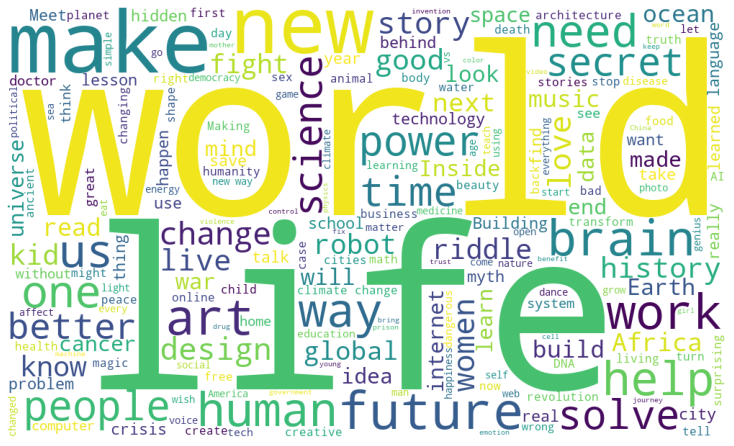

In [ ]:
#visualize word cloud from title
words = ' '.join(text for text in ted_talk_data.title.astype(str))
print(f'There are {len(words)} words in the combination of all titles in dataset.\n')

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

Majority of titles contains words: life, world, make, new, future, art, brain,work, human, science.

*   ### **Speaker_1**

In [ ]:
#speaker of top 10 view video
top_10_views_data = ted_talk_data.nlargest(10, ['views'])
top_10_views_data[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


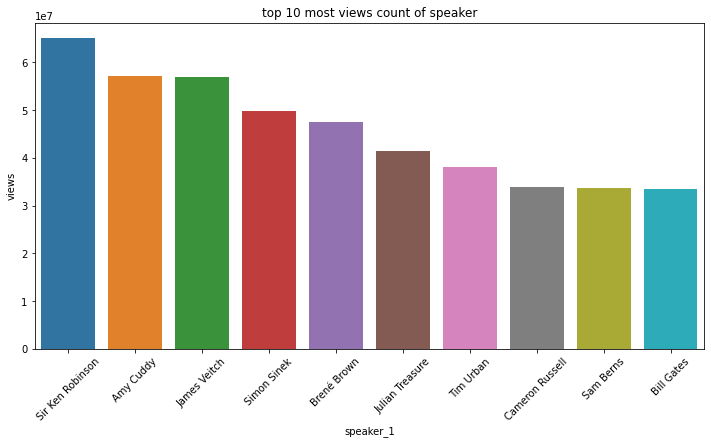

In [ ]:
#visualize speaker of top 10 view video
plt.figure(figsize=(12,6))
plt.title("top 10 most views count of speaker")
sns.barplot('speaker_1','views',data = top_10_views_data)
plt.xticks(rotation = 45)
plt.show()

Sir Ken Robinson,s talk have the highest view count.

* **most popular speaker**

In [ ]:
#top 10 popular speaker
top_10_popular_data=ted_talk_data.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
top_10_popular_data.reset_index(inplace=True)
top_10_popular_data

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


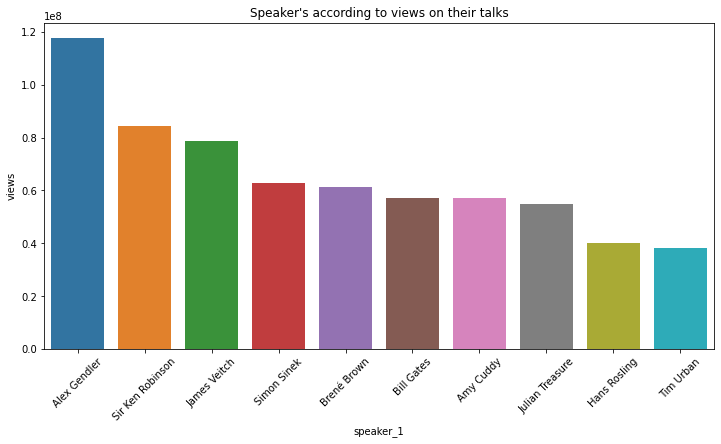

In [ ]:
#visualize top 10 popular speaker
plt.figure(figsize=(12,6))
plt.title("Speaker's according to views on their talks")
sns.barplot('speaker_1','views',data=top_10_popular_data)
plt.xticks(rotation = 45)
plt.show()

Alex Gendler is the most popular speaker.

* ### **Event**

In [ ]:
#top 10 most frequent event
top_10_freq_event=ted_talk_data[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
top_10_freq_event.reset_index(inplace=True)
top_10_freq_event

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


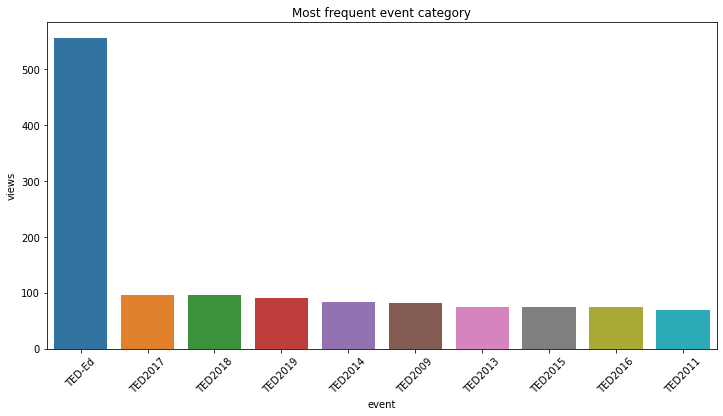

In [ ]:
#visualize top 10 most frequent event
plt.figure(figsize=(12,6))
plt.title('Most frequent event category')
sns.barplot('event','views',data=top_10_freq_event)
plt.xticks(rotation=45)
plt.show()

TED-Ed is the most frequent event

* **popular event**

In [ ]:
#top 10 popular event
top_10_popular=ted_talk_data[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
top_10_popular.reset_index(inplace=True)
top_10_popular

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


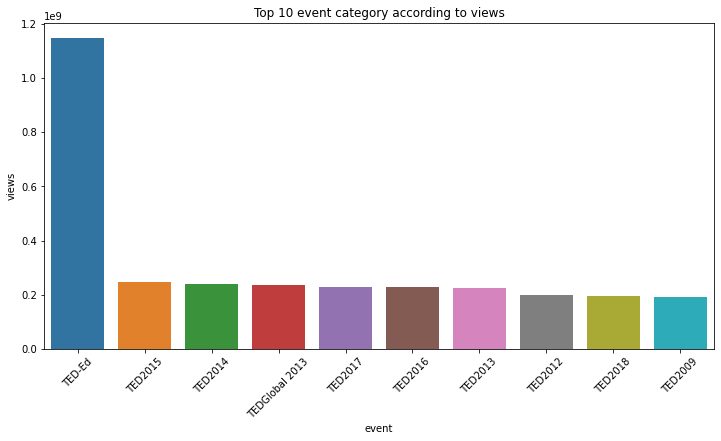

In [ ]:
#visualize top 10 popular event
plt.figure(figsize=(12,6))
plt.title('Top 10 event category according to views')
sns.barplot('event','views',data=top_10_popular)
plt.xticks(rotation=45)
plt.show()

Most popular event is TED-Ed having highest number of total views.

* ### **Topics**

There are 404126 words in the combination of all topics.



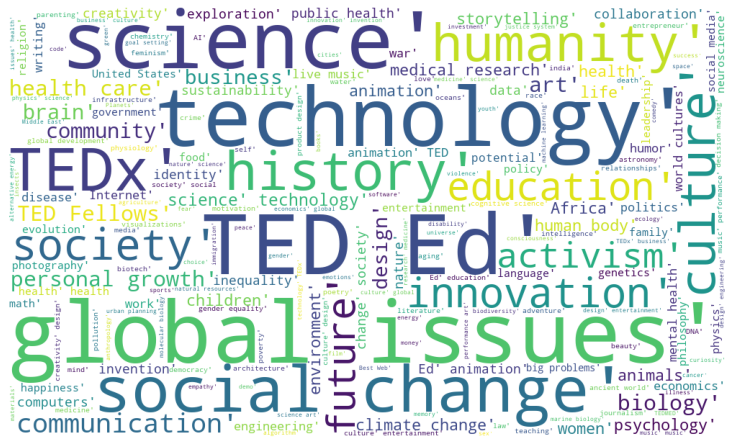

In [ ]:
#word cloud from topics
words =' '.join(text for text in ted_talk_data.topics.astype(str))
print (f'There are {len(words)} words in the combination of all topics.\n')

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

Most popular topic tags are TED Ed, technology, global issues, science, TEDx, Social change, humanity, society, activism,education, communication.

* ### **Published_date**

In [ ]:
#convert published_date column to date time format
ted_talk_data['published_date'] = ted_talk_data['published_date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
#create day, month and year from the published_date column
ted_talk_data['published_day'] = ted_talk_data['published_date'].apply(lambda x: x.weekday())
ted_talk_data['published_month']=ted_talk_data['published_date'].apply(lambda x: x.month)
ted_talk_data['published_year'] = ted_talk_data['published_date'].apply(lambda x: x.year)

* #### **published_day**

In [ ]:
# map published_day column with respective week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
ted_talk_data['published_day']=ted_talk_data['published_day'].map(week_day)

In [ ]:
# which day of the month having maximum published
publish_day_freq=ted_talk_data[['published_day','views']].groupby('published_day').agg({'views' : 'count'})
publish_day_freq=publish_day_freq.sort_values('views',ascending=False)
publish_day_freq.reset_index(inplace=True)
publish_day_freq

,published_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


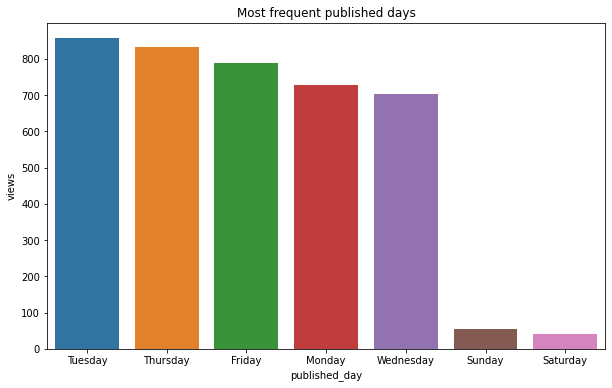

In [ ]:
# visualise which day of the month having maximum published
plt.figure(figsize=(10,6))
sns.barplot('published_day','views',data=publish_day_freq)
plt.title('Most frequent published days')
plt.show()

Most Talks are published on 5 days in week Tuesday,Thursday,Friday,Monday,Wednesday.

In [ ]:
# best published day of the week by average views count
best_day=ted_talk_data[['published_day','views']].groupby('published_day').agg({'views' : 'mean'})
best_day=best_day.sort_values('views',ascending=False)
best_day.reset_index(inplace=True)

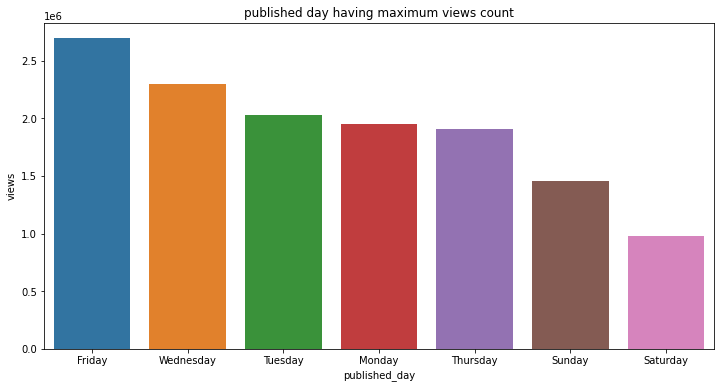

In [ ]:
# visualise best published day of the week by average views count
plt.figure(figsize=(12,6))
plt.title('published day having maximum views count')
sns.barplot('published_day','views',data=best_day)
plt.show()

Friday published talks have more average views count

* #### **published_month**

In [ ]:
# published_month change to respective month name
month_name={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
ted_talk_data['published_month']=ted_talk_data['published_month'].map(month_name)

In [ ]:
# which month maximum published talks
published_month_freq=ted_talk_data[['published_month','views']].groupby('published_month').agg({'views' : 'count'})
published_month_freq=published_month_freq.sort_values('views',ascending=False)
published_month_freq.reset_index(inplace=True)

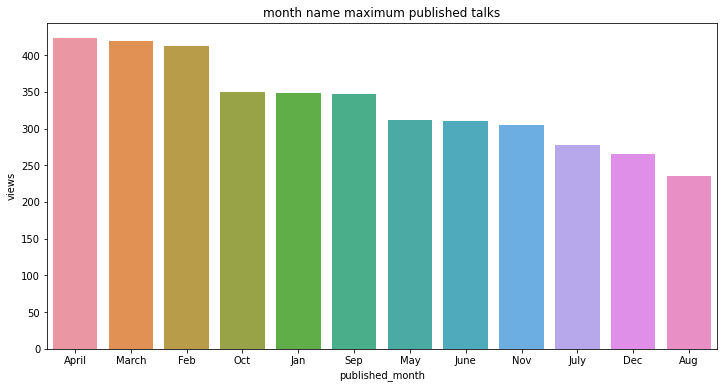

In [ ]:
# visualise which month maximum published talks
plt.figure(figsize=(12,6))
sns.barplot('published_month','views',data=published_month_freq)
plt.title('month name maximum published talks')
plt.show()

April, March, and Feb months have highest frequency of published talks

In [ ]:
# best published months by average views count
published_month_best=ted_talk_data[['published_month','views']].groupby('published_month').agg({'views' : 'mean'})
published_month_best=published_month_best.sort_values('views',ascending=False)
published_month_best.reset_index(inplace=True)

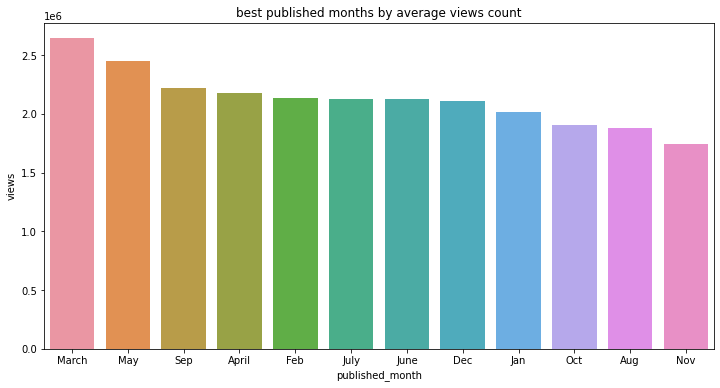

In [ ]:
# visualise best published months by average views count
plt.figure(figsize=(12,6))
plt.title('best published months by average views count')
sns.barplot('published_month','views',data=published_month_best)
plt.show()

March month have more average views count

* #### **Release_year**

In [ ]:
# which years have maximum published 
published_year_freq=ted_talk_data[['published_year','views']].groupby('published_year').agg({'views' : 'count'})
published_year_freq=published_year_freq.sort_values('views',ascending=False)
published_year_freq.reset_index(inplace=True)

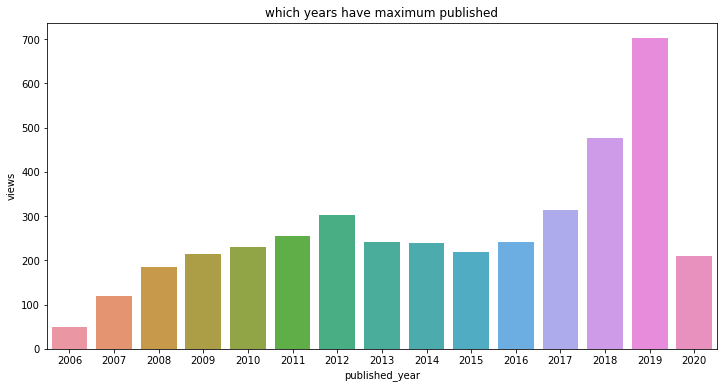

In [ ]:
# visualise which years have maximum published 
plt.figure(figsize=(12,6))
sns.barplot('published_year','views',data=published_year_freq)
plt.title('which years have maximum published')
plt.show()

In 2019 have Published maximum talks

In [ ]:
# best published year by average views count
published_year_best=ted_talk_data[['published_year','views']].groupby('published_year').agg({'views' : 'mean'})
published_year_best=published_year_best.sort_values('views',ascending=False)
published_year_best.reset_index(inplace=True)

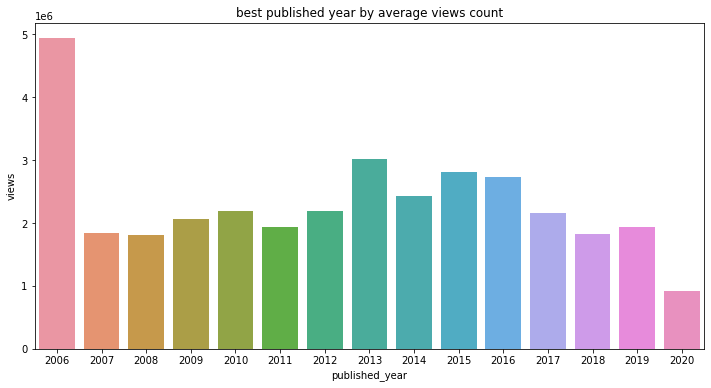

In [ ]:
# visualise best published year by average views count
plt.figure(figsize=(12,6))
plt.title('best published year by average views count')
sns.barplot('published_year','views',data=published_year_best)
plt.show()

in 2016 have highest number of average view count

* ### **Views**

**This is our target as well as numerical variable. So, let's check its distribution.**

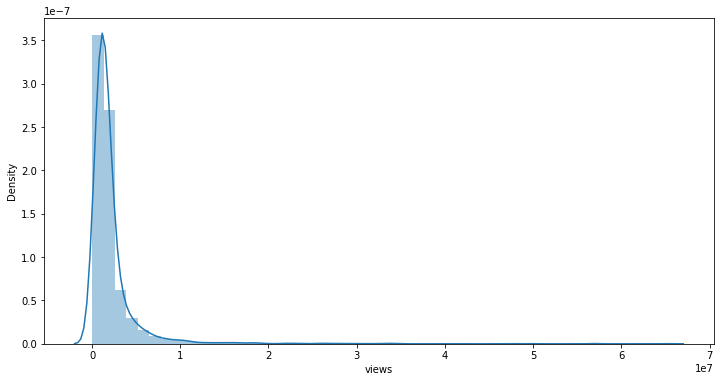

In [ ]:
# distribution of views feature
plt.figure(figsize=(12,6))
sns.distplot(ted_talk_data.views)
plt.show()

views feature are right skewed distribution

* ### **Comments**

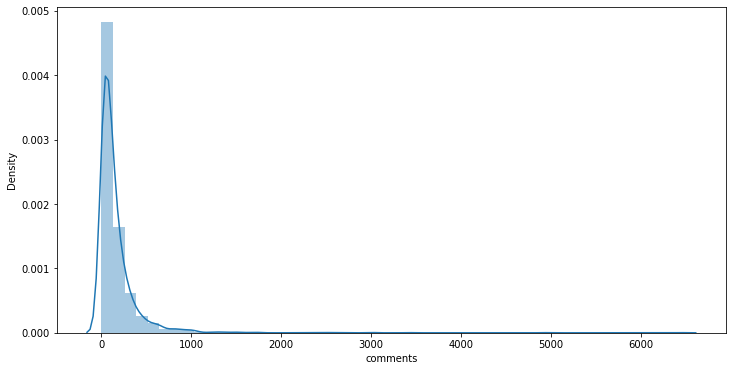

In [ ]:
# distribution of comments feature
plt.figure(figsize=(12,6))
sns.distplot(ted_talk_data.comments)
plt.show()

comments feature are right skewed distribution

* ### **Duration**

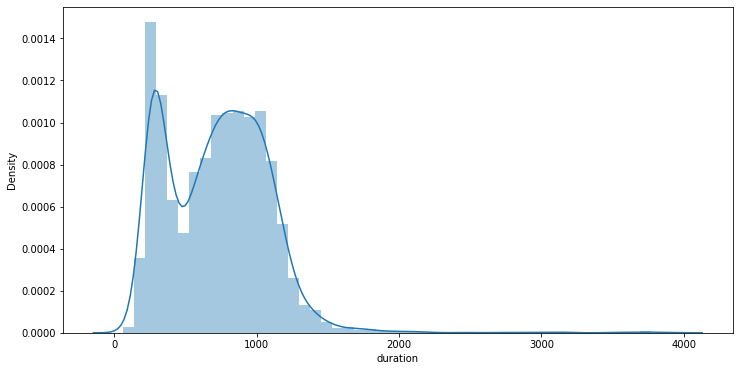

In [ ]:
# distribution of duration feature
plt.figure(figsize=(12,6))
sns.distplot(ted_talk_data.duration)
plt.show()

duration feature are right skewed distribution

* ### **Talk_id**

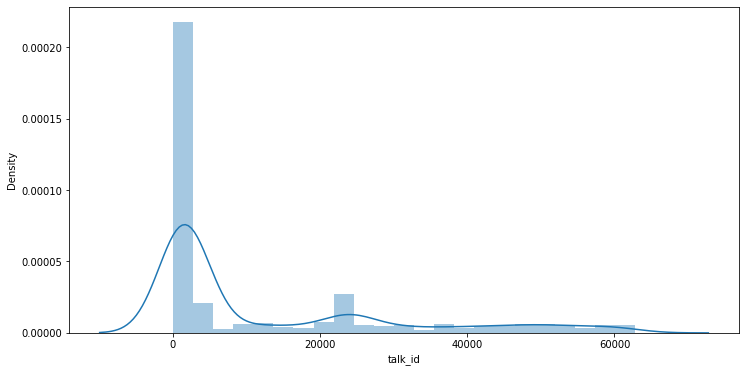

In [ ]:
# distribution of duration feature
plt.figure(figsize=(12,6))
sns.distplot(ted_talk_data.talk_id)
plt.show()

talk_id feature are right skewed distribution

##**Feature Engineering**

* ### **Speaker_1**

In [ ]:
# create new feature speaker_1_avg_views
speaker_avg_views=ted_talk_data.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker_avg_views = speaker_avg_views.to_dict()
speaker_avg_views = speaker_avg_views.values()
speaker_avg_views =  list(speaker_avg_views)[0]
ted_talk_data['speaker_1_avg_views'] = ted_talk_data['speaker_1'].map(speaker_avg_views)

In [ ]:
#now drop speaker_1 feature
ted_talk_data = ted_talk_data.drop('speaker_1', axis=1)

* ### **event**

In [ ]:
# How many unique event name present in dataset
ted_talk_data['event'].nunique()

459

* event feature have lots of similar event name

In [ ]:
print(list(ted_talk_data['event'].unique()))

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

In [ ]:
#create new feature event_wise_avg_views
event_wise = ted_talk_data.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
event_wise = event_wise.to_dict()
event_wise = event_wise.values()
event_wise =  list(event_wise)[0]
ted_talk_data['event_wise_avg_views'] = ted_talk_data['event'].map(event_wise)

In [ ]:
#now drop event feature
ted_talk_data = ted_talk_data.drop('event', axis=1)

* ### **available_lang**

In [ ]:
#create new feature num_of_lang
ted_talk_data['available_lang'] = ted_talk_data.apply(lambda x: eval(x['available_lang']), axis=1)
ted_talk_data['num_of_lang'] = ted_talk_data.apply(lambda x: len(x['available_lang']), axis=1)

In [ ]:
#now drop available_lang feature
ted_talk_data = ted_talk_data.drop('available_lang', axis=1)

* ### **topics**

In [ ]:
#create new feature num_of_tag
ted_talk_data['topics'] = ted_talk_data.apply(lambda x: eval(x['topics']), axis=1)
ted_talk_data['num_of_tag'] = ted_talk_data.apply(lambda x: len(x['topics']), axis=1)

In [ ]:
#find unique topics name from topics feature
unique_topics=[]
for i in range(0,len(ted_talk_data)):
  temp = ted_talk_data['topics'][i]
  for words in temp:
    if(words not in unique_topics):
      unique_topics.append(words)

In [ ]:
#storing avg views with respect to each topic in dict unique_topics_avg_views_dict
unique_topics_avg_views_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(ted_talk_data)):
    temp2=ted_talk_data['topics'][i]
    if(topic in temp2):
      temp+=ted_talk_data['views'][i]
      count+=1
  unique_topics_avg_views_dict[topic]=temp//count

#create new feature topics_wise_avg_views

topics_wise_avg_views=[]
for i in range(0,len(ted_talk_data)):
  temp=0
  temp_topic=ted_talk_data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_views_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

temp_df = pd.Series(topics_wise_avg_views)
ted_talk_data['topics_wise_avg_views'] = temp_df.values

In [ ]:
#now drop topics feature
ted_talk_data = ted_talk_data.drop('topics', axis=1)

* ### **published_date**

In [ ]:
#create new feature video_age
ted_talk_data['video_age'] = 2021 - ted_talk_data['published_year']

In [ ]:
#now drop published_date feature
ted_talk_data = ted_talk_data.drop('published_date', axis=1)

* ### **related_talks**

In [ ]:
# create new feature related_views
ted_talk_data['related_talks'] = ted_talk_data.apply(lambda row: eval(row['related_talks']),axis=1)

ted_talk_data['related_views'] = 0

for index, row in ted_talk_data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(ted_talk_data)):
      if (ted_talk_data.loc[i,'talk_id']) in id_list:
        temp+=ted_talk_data.loc[i,'views']

    ted_talk_data.loc[index,'related_views']=temp//6

In [ ]:
#now drop related_talks feature
ted_talk_data = ted_talk_data.drop('related_talks', axis=1)

## **Data Cleaning**

* ### **Treating NaN values**

In [ ]:
#how many null value present in dataset
ted_talk_data.isna().sum()

talk_id                    0
title                      0
all_speakers               4
occupations              522
about_speakers           503
views                      0
recorded_date              1
native_lang                0
comments                 655
duration                   0
url                        0
description                0
transcript                 0
published_day              0
published_month            0
published_year             0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tag                 0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

In [ ]:
#drop some feature that are not important
ted_talk_data.drop(['talk_id','title','all_speakers', 'occupations','about_speakers','recorded_date','native_lang',
                    'url','description','transcript','published_year'],axis=1, inplace=True)

In [ ]:
#again check how many null value present in dataset after removing some features
ted_talk_data.isna().sum()

views                      0
comments                 655
duration                   0
published_day              0
published_month            0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tag                 0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

old column name( delete krna hai)

views                      0,
comments                 655,
duration                   0,
release_day                0,
release_month              0,
speaker_1_avg_views        0,
event_wise_avg_views       0,
num_of_lang                0,
num_of_tags                0,
topics_wise_avg_views      0,
video_age                  0,
related_views              0

* ### **Imputing NaN values**

In [ ]:
#Impute NaN values in comments feature
from sklearn.impute import KNNImputer
imputer = KNNImputer()
ted_talk_data[['comments']] = imputer.fit_transform(ted_talk_data[['comments']])

In [ ]:
#once again check comments feature have any NaN values
ted_talk_data['comments'].isna().sum()

0

* now not any NaN value present in dataset

* ### **Outlier treatment**

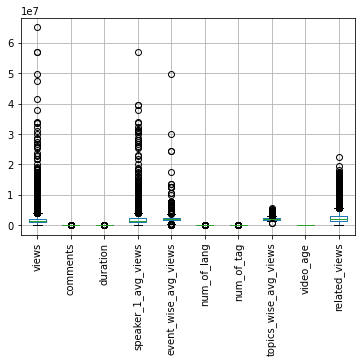

In [ ]:
#visualize box plot to whole dataset
ted_talk_data.boxplot(rot=90)
plt.show()

In [ ]:
#total number of outliers feature-wise in dataset
Q1 = ted_talk_data.quantile(0.25)
Q3 = ted_talk_data.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

((ted_talk_data < (lower_limit)) | (ted_talk_data > (upper_limit))).sum()

comments                 361
duration                  21
event_wise_avg_views     156
num_of_lang              121
num_of_tag               116
published_day              0
published_month            0
related_views            300
speaker_1_avg_views      373
topics_wise_avg_views    242
video_age                  0
views                    393
dtype: int64

In [ ]:
#outliers with extreme values
l = ['views','comments','duration','speaker_1_avg_views','event_wise_avg_views','num_of_lang','num_of_tag',
     'topics_wise_avg_views','related_views']

for i in l:
  Q1 = ted_talk_data[i].quantile(0.25)
  Q3 = ted_talk_data[i].quantile(0.75)
  IQR = Q3 - Q1

  ted_talk_data[i]=np.where(ted_talk_data[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),
                            np.where(ted_talk_data[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),ted_talk_data[i]))

In [ ]:
#again check total number of outliers feature-wise in dataset
Q1 = ted_talk_data.quantile(0.25)
Q3 = ted_talk_data.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

((ted_talk_data < (lower_limit)) | (ted_talk_data > (upper_limit))).sum()

comments                 0
duration                 0
event_wise_avg_views     0
num_of_lang              0
num_of_tag               0
published_day            0
published_month          0
related_views            0
speaker_1_avg_views      0
topics_wise_avg_views    0
video_age                0
views                    0
dtype: int64

* we have treated all outliers, now not any outliers present in dataset

## **Feature Selection**

In [ ]:
#assign X in independent variables and y in dependent variable (views)
X = ted_talk_data.drop('views', axis=1)
y = ted_talk_data['views']

In [ ]:
#one hot encoding on independent features
X = pd.get_dummies(X)
X.shape

(4005, 28)

* now total 28 independent features present in dataset we need to select only important feature that can help to our objective

* ### **Feature selection using f_regression**

In [ ]:
#f scores of all independent features
f_scores = f_regression(X, y)

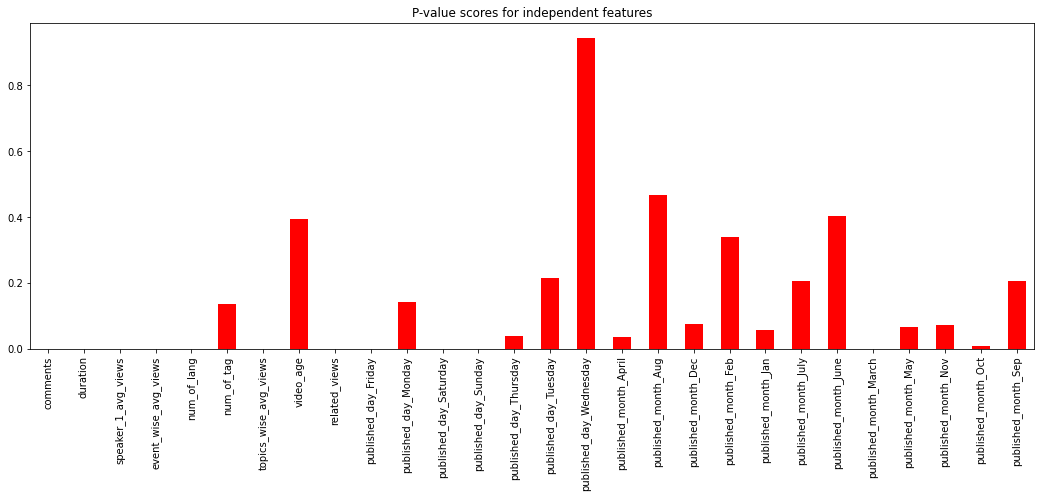

In [ ]:
#visualize P-value scores of all independent features
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='red',figsize=(18,6))
plt.title('P-value scores for independent features')
plt.show()

In [ ]:
#take the important features only that have not high p_value
X = X[['comments','duration','speaker_1_avg_views','event_wise_avg_views','num_of_lang','topics_wise_avg_views','related_views',
       'published_day_Friday','published_day_Saturday','published_day_Sunday','published_month_March']]

In [ ]:
X.shape

(4005, 11)

* we have selected only 11 important independent feature according to the p_value

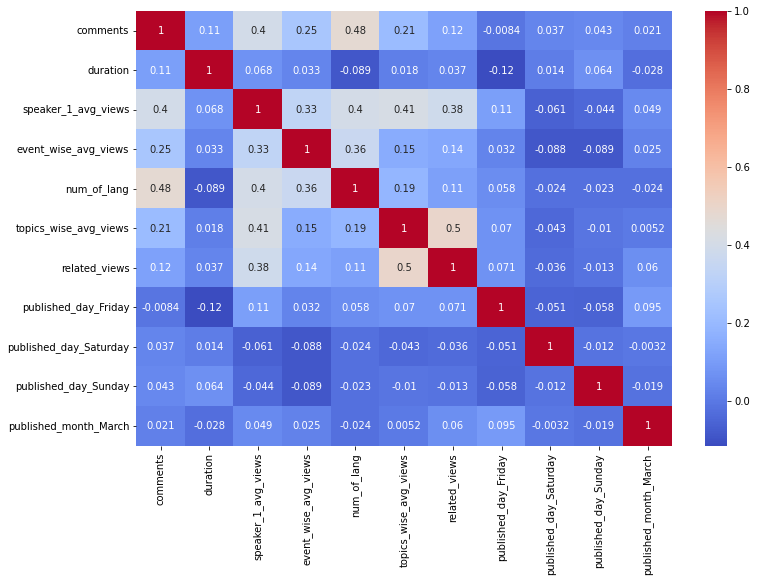

In [ ]:
#correlation matrix of selected features.
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(),annot=True, cmap='coolwarm')
plt.show()

* ### **split data into Training, Testing data and feature scaling**

In [ ]:
#spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
#independent feature scaling in training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)